# Parte 1: Teoría de álgebra lineal y optimización

1-. ¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?

Un espacio vectorial se genera por cualquier conjunto de vectores x1, ..., xk; sus columnas son el efecto sobre los vectores canónicos. Una matriz es la colección de un conjunto de vectores.
un vector es una entidad que tiene longitud y dirección 

2.- ¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?

Es el determinante, que graficamente puede interpretarse como una distorsión del volumen/área. 
En el caso de la matriz diagonal, la transformación lineal desemboca en el cambio del volumen. 
En el caso de la matriz ortogonal, la transformación lineal impacta por medio de reflexiones y rotaciones.

3.- ¿Qué es la descomposición en valores singulares de una matriz?

La descomposición en valores singulares de una matriz muestra que toda transformación lineal es una rotación + redimensión de los ejes canónicos + rotación; es decir, muestra los ejes de máxima distorsión de una matriz.

4.- ¿Qué es diagonalizar una matriz y que representan los eigenvectores?

Diagonalizar una matriz es encontrar base de eigenvectores.
Los eigenvectores muestran la solución a un problema de optimización

5.- ¿Intuitivamente qué son los eigenvectores?

Muestran la máxima distorsión
Son las direcciones a lo largo de las cuales la transformación lineal ocurre solamente por el escalamiento, mientras que los valores propios λi son las escalas a lo largo de esas direcciones. Para matrices simétricas, los vectores propios son ortogonales entre sí. 

6.- ¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos de transformaciones lineales simples?

7.- ¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?

Si A es una matriz de m*n, los valores singulares de A son las raices cuadradas de los autovalores de (A^T)*A

8.- ¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor a una matriz?

La descomposición en valores singulares provee una aproximación de la matriz en cuestión que corresponde solamente a los k primeros valores singulares y los correspondientes vectores singulares siendo no nulos.

9.- Describe el método de minimización por descenso gradiente

Consiste en la selección del elemento que maximiza el ascenso o descenso (según sea el caso) una función con base en un conjunto de elementos disponibles

El método del gradiente consiste en un algortimo específico para la resolución de un modelo de programación lineal sin restricciones, perteneciente a la categoría de algoritmos generales de descenso, donde la búsqueda de un mínimo esta asociado a la resolución secuencial de una serie de problemas unidimensionales.

10.- Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parecan interesantes como Científico de Datos

Eficiencia terminal de los alumnos en las carreras de Ciencias de la Salud en México; comparando los resultados entre universidades públicas y privadas
Reducir el costo de la nómina docente en la Universidad del Valle de México
Programa social para maximizar el numero de beneficiarios a salud pública en personas de la 3ra edad
Sistema que permita mapear la congestión vehicular para agilizar la movilidad y así optimizar los espacios de las ciudades

# Parte 2: Aplicaciones en Python

Recibir el path de un archivo de imagen png y convertirlo en una matriz numérica que represente a la versión en blanco y negro de la imagen. 
Ayuda "https://stackoverflow.com/questions/27026866/convert-an-image-to-2d-array-in-python"

Realizar y verificar la descomposición svd

Usar la descomposición para dar una aproximación de grado k de la imagen.

Para alguna imagen de su elección, elegir distintos valores de aproximación a la imagen original.

Contestar, ¿qué tiene que ver este proyecto con compresión de imágenes?

In [4]:
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import PIL.Image                  # funciones para cargar y manipular imágenes

In [5]:
im = PIL.Image.open("/Users/Karen/image.jpg")
col,row =  im.size
image = np.zeros((row*col, 5))
pixels = im.load()
print(pixels[188,266])
for i in range(col):
    for j in range(row):
        #print("i=%d, j=%d" % (i,j))        
        r,g,b =  pixels[i,j]
        image[i*col + j,:] = r,g,b,i,j

(255, 255, 255)


In [6]:
im.size

(189, 267)

In [7]:
image

array([[ 255.,  255.,  255.,    0.,    0.],
       [ 255.,  255.,  255.,    0.,    1.],
       [ 255.,  255.,  255.,    0.,    2.],
       ..., 
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.]])

In [8]:
print(image)

[[ 255.  255.  255.    0.    0.]
 [ 255.  255.  255.    0.    1.]
 [ 255.  255.  255.    0.    2.]
 ..., 
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.]]


In [9]:
image.shape

(50463, 5)

# Descomposición SVD

In [10]:
import numpy as np
RH = np.linalg

In [11]:
U, s, Vh = RH.svd(image, full_matrices=False)
assert np.allclose(image, np.dot(U, np.dot(np.diag(s), Vh)))

In [12]:
R_H = np.dot(np.dot(U, np.diag(s)), Vh)
print(np.std(image), np.std(R_H), np.std(image - R_H))

109.135979512 109.135979512 4.68415566002e-13


In [13]:
U

array([[ -5.03865991e-03,   1.13218331e-02,  -4.35226270e-03,
          9.88148890e-01,   5.39471383e-03],
       [ -5.04119010e-03,   1.12434451e-02,  -4.39610883e-03,
          3.45143221e-03,  -9.98085823e-01],
       [ -5.04372029e-03,   1.11650572e-02,  -4.43995497e-03,
          7.52849352e-05,   1.16512385e-04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])

In [14]:
s

array([  8.35811677e+04,   1.10814934e+04,   1.02178316e+04,
         5.52922688e-12,   2.59843531e-13])

In [15]:
s.shape

(5,)

In [25]:
Vh

array([[ -5.50505985e-01,  -5.50505985e-01,  -5.50505985e-01,
         -2.14725877e-01,  -2.11476424e-01],
       [  1.64003685e-01,   1.64003685e-01,   1.64003685e-01,
         -4.05888871e-01,  -8.68655627e-01],
       [ -5.81316173e-02,  -5.81316173e-02,  -5.81316173e-02,
          8.88339475e-01,  -4.48012414e-01],
       [  8.15285063e-01,  -3.69136702e-01,  -4.46148362e-01,
          6.43276414e-17,   3.13037723e-17],
       [  4.44627024e-02,  -7.28288927e-01,   6.83826225e-01,
         -3.51565905e-17,   1.08984891e-16]])

In [26]:
import scipy.linalg as sc

In [27]:
S = sc.diagsvd(s, 5, 5)
S

array([[  8.35811677e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.10814934e+04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.02178316e+04,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.52922688e-12,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.59843531e-13]])

# Verificar la descomposición SVD

In [28]:
U @ S @ Vh

array([[  2.55000000e+02,   2.55000000e+02,   2.55000000e+02,
         -6.91926516e-11,  -1.90425453e-11],
       [  2.55000000e+02,   2.55000000e+02,   2.55000000e+02,
          1.72740044e-10,   1.00000000e+00],
       [  2.55000000e+02,   2.55000000e+02,   2.55000000e+02,
         -1.33475453e-10,   2.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])

# Hacer la aproximación de orden k

In [33]:
from scipy import *
from pylab import *
im = imread("/Users/Karen/image.jpg")[:,:,0]
gray()
figure(1)
imshow(image)

In [36]:
m,n = img.shape
m,n

(267, 189)

In [37]:
U,s,Vt = svd(img)

In [38]:
Vt.shape

(189, 189)

In [39]:
s.shape

(189,)

In [40]:
S = resize(s,[m,1])*eye(m,n)
S

array([[ 55058.97286581,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,   3861.79315525,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,   1673.06255631, ...,
             0.        ,      0.        ,      0.        ],
       ..., 
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

In [41]:
S.shape

(267, 189)

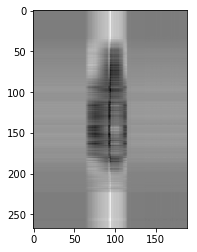

In [45]:
m,n = img.shape
U,s,Vt = svd(img)
S = resize(s,[m,1])*eye(m,n)
k = 3
imshow(dot(U[:,1:k],dot(S[1:k,1:k],Vt[1:k,:])))
show()

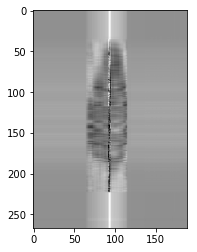

In [46]:
k = 6
imshow(dot(U[:,1:k],dot(S[1:k,1:k],Vt[1:k,:])))
show()

In [ ]:
k = 10
imshow(dot(U[:,1:k],dot(S[1:k,1:k],Vt[1:k,:])))
show()

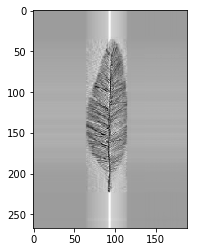

In [48]:
k = 20
imshow(dot(U[:,1:k],dot(S[1:k,1:k],Vt[1:k,:])))
show()

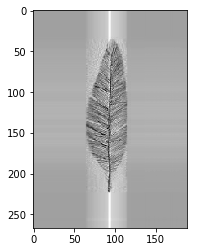

In [49]:
k = 25
imshow(dot(U[:,1:k],dot(S[1:k,1:k],Vt[1:k,:])))
show()

¿Que tiene que ver este proyecto con la compresión de imágenes?
La descomposición en valores singulares aplicado en el tratamiento de imágenes tiene como objetivo, comprimir la información implícita de una matriz; para ello, prevalecen los valores singulares que son determinantes en la formación de la matriz y, en ocasiones, permite eliminar el ruido de la imagen.

Ahora veremos la aplicación a pseudoinversa y sistemas de ecuaciones 
Programar una función que dada cualquier matriz devuelva la pseudainversa usando la descomposición SVD. Hacer otra función que resuelva cualquier sistema de ecuaciones de la forma Ax=b usando esta pseudoinversa.


In [2]:
from numpy import *
import numpy as np

def gen_mat(i,j):
    A = floor(random.rand(i,j)*20-0) # se está haciendo una matriz aleatoria de 5x5
    b = floor(random.rand(j,1)*20-0) # este es el vector de resultados b
    return A,b

In [11]:
A,b= gen_mat(5,5)

In [12]:
A

array([[ 17.,   8.,  11.,  10.,  11.],
       [  8.,   6.,   4.,  14.,  15.],
       [ 19.,  13.,   3.,  16.,   5.],
       [ 18.,  12.,  12.,  17.,  18.],
       [  3.,   7.,  12.,   1.,   1.]])

In [13]:
b

array([[ 9.],
       [ 2.],
       [ 0.],
       [ 9.],
       [ 6.]])

In [14]:
#Esto sólo sirve para matrices cuadradas.
def Inversa(A):
    if((A.shape[0] == A.shape[1])):
        U,s,V=np.linalg.svd(A)
        Inversa = np.dot(np.dot(V.T,linalg.inv(diag(s))),U.T)
        return Inversa
    else:
        return "La Matriz no es cuadrada, calcula la pseudoinversa"

In [15]:
w=Inversa(A)
w

array([[  5.84775587e-02,  -1.13917948e-01,   7.23135516e-04,
          6.33948802e-02,  -7.92074435e-02],
       [ -6.40071349e-01,  -6.50050619e-01,  -3.09984091e-02,
          9.49139469e-01,  -1.37974256e-01],
       [  3.44983850e-01,   3.79887191e-01,   1.66321169e-02,
         -5.41917755e-01,   1.78228800e-01],
       [  4.86236321e-01,   7.09829822e-01,   1.14833920e-01,
         -9.32893024e-01,   2.21857976e-01],
       [ -3.20975751e-01,  -3.76367931e-01,  -9.95998650e-02,
          6.01745167e-01,  -1.57161452e-01]])

In [16]:
m,n=A.shape
m,n

(5, 5)

In [17]:
U, s, V = np.linalg.svd(A)

In [18]:
s

array([ 56.07557823,  13.00876167,  11.84942631,   5.16496574,   0.46461912])

In [19]:
U.shape

(5, 5)

In [20]:
V.shape

(5, 5)

In [21]:
S=eye(m,n)
S

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [22]:
S = resize(s,[m,1])*eye(m,n)
S

array([[ 56.07557823,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  13.00876167,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  11.84942631,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   5.16496574,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.46461912]])

In [23]:
Sigma = np.zeros([U.shape[1],V.shape[0]])
Sigma

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [24]:
def P_Inversa(A):
    import numpy as np
    if isinstance(A, np.ndarray): 
        U, s, V = np.linalg.svd(A)
        m,n=A.shape
        S = resize(s,[m,1])*eye(m,n) 
        for i in range(S.shape[0]):
            for j in range(S.shape[1]):
                if (i == j):
                    if (s[i] == 0):
                        S[i,j] == 0
                    else:
                        S[i,j] = 1/s[i]
                        
        P_Inversa = np.dot(np.dot(V.T,S.T),U.T)
        return(P_Inversa)
    else:
        return "Errores en la especificación"

In [25]:
A_I=P_Inversa(A)
A_I

array([[  5.84775587e-02,  -1.13917948e-01,   7.23135516e-04,
          6.33948802e-02,  -7.92074435e-02],
       [ -6.40071349e-01,  -6.50050619e-01,  -3.09984091e-02,
          9.49139469e-01,  -1.37974256e-01],
       [  3.44983850e-01,   3.79887191e-01,   1.66321169e-02,
         -5.41917755e-01,   1.78228800e-01],
       [  4.86236321e-01,   7.09829822e-01,   1.14833920e-01,
         -9.32893024e-01,   2.21857976e-01],
       [ -3.20975751e-01,  -3.76367931e-01,  -9.95998650e-02,
          6.01745167e-01,  -1.57161452e-01]])

In [27]:
def Solucion(A,b):
    import numpy as np
    if isinstance(A, np.ndarray):
        if isinstance(b, np.ndarray):
            if((A.shape[1] == b.shape[0])):#la matriz y el vector son compatibles
                if((A.shape[0] == A.shape[1])):
                    A_inv=Inversa(A)
                    x_sol = np.dot(A_inv,b)
                else:
                    A_inv=P_Inversa(A)
                    x_sol = np.dot(A_inv.T,b)
                return(x_sol)   
            else:
                return "A y b son incompatibles"
        else:
            return "Problemas con b"
    else:
        return "Problemas con A"

In [28]:
x = Solucion(A,b)
x

array([[ 0.39377139],
       [ 0.6536663 ],
       [ 0.05674203],
       [-1.26910283],
       [ 0.83122017]])

Dado el sistema Ax=b donde A = [[1,1],[0,0]] y b puede tomar distintos valores. 
a) Observar que pasa si b está en la imagen de A (contestar cuál es la imagen) y si no está (ej. b = [1, 1]). 
b) Contestar, ¿la solución resultante es única? Si hay más de una solución, investigar que caracteriza a la solución directa. 
c) Repetir cambiando A = [[1,1],[0, 1e-32]], ¿en este caso, la solución es única? ¿Cambia el valor devuelto de x en cada posible valor de b en el punto anterior?

In [29]:
import numpy as np
A1 =np.array([[1,1],[0,0]])
A1

array([[1, 1],
       [0, 0]])

In [30]:
b1=np.array([[1],[1]])
b1

array([[1],
       [1]])

In [31]:
x1 = Solucion(A1,b1)
x1

LinAlgError: Singular matrix

In [32]:
d=np.linalg.det(A1) 
d

0.0

In [33]:
def Solucion(A,b):
    import numpy as np
    import warnings
    if isinstance(A, np.ndarray):
        if isinstance(b, np.ndarray):
            if((A.shape[1] == b.shape[0])):#la matriz y el vector son compatibles
                if((A.shape[0] == A.shape[1]) and np.linalg.det(A) != 0):
                    A_inv=Inversa(A)
                    x_sol = np.dot(A_inv,b)
                    return(x_sol)
                elif (np.linalg.det(A)==0):
                    A_inv=P_Inversa(A)
                    x_sol = np.dot(A_inv.T,b)
                    print(x_sol) 
                    print("La Matriz A es singular")
                else:
                    A_inv=P_Inversa(A)
                    x_sol = np.dot(A_inv.T,b)
                    return(x_sol)   
            else:
                return "A y b son incompatibles"
        else:
            return "Problemas con b"
    else:
        return "Problemas con A"

In [34]:
x1 = Solucion(A1,b1)
x1

[[ 1.]
 [ 0.]]
La Matriz A es singular


Prueba con valores distintos

In [35]:
b2=np.array([[1],[2]])
x2 = Solucion(A1,b2)
x2

[[ 1.5]
 [ 0. ]]
La Matriz A es singular


In [36]:
b3=np.array([[1],[0]])
x3 = Solucion(A1,b3)
x3

[[ 0.5]
 [ 0. ]]
La Matriz A es singular


La Imagen de A, son todas las posibles combinaciones lineales de las columnas de A.

Cambiando el valor de la posición [2,2] de la Matriz A1 por el valor 1e-32.

In [39]:
A2 =np.array([[1,1],[0,1e-32]])
A2

array([[  1.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e-32]])

In [40]:
x4 = Solucion(A2,b1)
x4

array([[ -1.00000000e+32],
       [  1.00000000e+32]])

In [41]:
x5 = Solucion(A2,b2)
x5

array([[ -2.00000000e+32],
       [  2.00000000e+32]])

Al cambiar la entrada [2,2] y correr para diferentes valores de b, observamos que el resultado esta determinado por la elección de b[2,1]. En este caso las soluciones parecen ser de la forma [-x,x] donde x=b[2,1].
Toma un valor muy grande. El pequeño cambio en la Matriz A hace que las soluciones sean muy diferenetes.

Ejercicio 3
Utilizar la paquetería pandas para trabajar el ajuste por mínimos cuadrados a un conjunto de datos.

In [61]:
import numpy as np
from pandas import DataFrame
import pandas as pd
import os

Programar un script que lea el archivo study_vs_sat.csv y lo almacene como un dataframe en pandas.

In [62]:
tabla = pd.read_csv("/Users/karen/study_vs_sat.csv")
tabla

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410
5,7,530
6,12,600
7,22,790
8,1,350
9,3,400


Plantear un problema de optimización que intente hacer una aproximación de la forma: sat_score ~ alpha + beta*study_hoursi, con un valor para cada individuo

In [63]:
df=pd.DataFrame(tabla)
df

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410
5,7,530
6,12,600
7,22,790
8,1,350
9,3,400


Plantear como un problema de optimización que intente hacer una aproximación de la forma sat_score ~ alpha + beta*study_hours minimizando la suma de los errores de predicción al cuadrado. Pueden consultar este link https://en.wikipedia.org/wiki/Simple_linear_regression ¿Cuál es el gradiente de la función que se quiere optimizar (hint: las variables que queremos optimizar son alpha y beta)?

In [64]:
import statsmodels.formula.api as sm

In [65]:
result = sm.ols(formula="sat_score ~ study_hours", data=df).fit()
print (result.params)

Intercept      353.164879
study_hours     25.326468
dtype: float64


In [66]:
study_hours=tabla["study_hours"]
sat_score=tabla["sat_score"]

In [67]:
Suma_study_hours = sum(study_hours)
Suma_sat_score = sum(sat_score)
Suma_hours_score = sum(study_hours*sat_score) 
Suma_hours_2 = sum(study_hours**2)
Suma_score_2 = sum(sat_score**2)
obs = len(study_hours)

In [68]:
Beta = (obs*Suma_hours_score - Suma_study_hours*Suma_sat_score)/(obs*Suma_hours_2 - Suma_study_hours**2)
Beta

25.326467777895743

In [69]:
Alpha = Suma_sat_score/obs - (Beta*Suma_study_hours)/obs
Alpha

353.1648794988852

In [70]:
def mco(b0, b1, X):
    rows = len(X)
    sat_score_e1 = np.array([b0 + b1*X[i] for i in range(rows)])
    return(sat_score_e1)

In [71]:
sat_score_e1=mco(Alpha, Beta, study_hours)
sat_score_e1

array([ 454.47075061,  581.1030895 ,  606.42955728,  707.73542839,
        454.47075061,  530.45015394,  657.08249283,  910.34717061,
        378.49134728,  429.14428283,  555.77662172,  631.75602506,
        479.79721839,  505.12368617,  606.42955728,  631.75602506,
        758.38836395,  682.40896061,  682.40896061,  606.42955728])